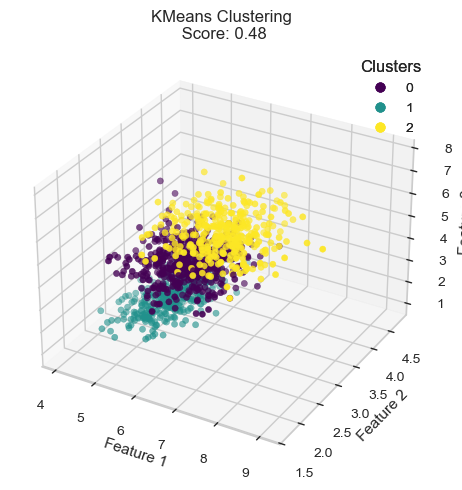

0.646053758659751
0.4848452136126464
0.3789503754481188
0.35925558508186917
0.22079414920834428
0.20040712604258218
0.31853404125098694
0.20085902536606035


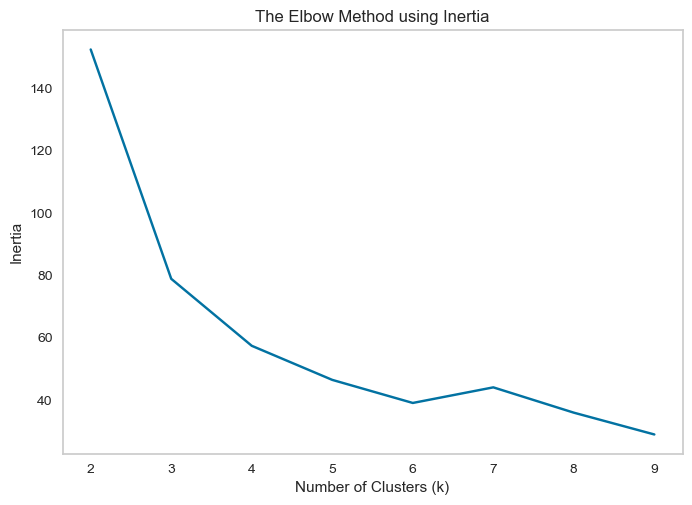

YellowbrickTypeError: The supplied model is not a clustering estimator; try a classifier or regression score visualizer instead!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
# from sklearn.metrics import  
from cluster import (KMeans)
from cluster.visualization import plot_3d_clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


def main(): 
    # Set random seed for reproducibility
    np.random.seed(42)
    # Using sklearn iris dataset to train model
    og_iris = np.array(load_iris().data)
    
    # Initialize your KMeans algorithm
    model = KMeans(k = 3, metric = "euclidean", max_iter = 1000, tol = 1e-6)
    
    # Fit model
    model.fit(og_iris)

    # Load new dataset
    df = np.array(pd.read_csv('data/iris_extended.csv', 
                usecols = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']))

    # Predict based on this new dataset
    predict = model.predict(df)
    
    # You can choose which scoring method you'd like to use here:
    score = silhouette_score(df, predict)
    
    # Plot your data using plot_3d_clusters in visualization.py
    plot_3d_clusters(df, predict, model, score)
    
    # Try different numbers of clusters
    inertias = []
    K = range(2, 10)
    for k in K:
        model = KMeans(k, metric = "euclidean", max_iter = 1000, tol = 1e-8)
        model.fit(og_iris)
        predict = model.predict(df)
        score = silhouette_score(df, predict)
        inertias.append(model.get_error())
        print(score)

    # Plot the elbow plot
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.grid()
    plt.show()
    visualizer = KElbowVisualizer(KMeans(k = 3, metric = "euclidean", max_iter = 1000, tol = 1e-6), k=(2,10))
    visualizer.show()
    # Question: 
    # Please answer in the following docstring how many species of flowers (K) you think there are.
    # Provide a reasoning based on what you have done above: 
    
    """
    How many species of flowers are there: 
    
    Reasoning: 
    
    
    
    
    """

    
if __name__ == "__main__":
    main()